for detailed explanation about PCA, please visit here: 
https://medium.com/mlearning-ai/ml-principal-component-analysis-200e992b837

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [4]:
fruits = np.load('C:/Users/juhyj/Desktop/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components = 50)
pca.fit(fruits_2d)
fruits_2d_pca_components = pca.components_
print(fruits_2d_pca_components.shape)

(50, 10000)


In [7]:
def draw_fruits(arr, ratio = 1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 +j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap = 'gray')
            axs[i, j].axis('off')
    plt.show()

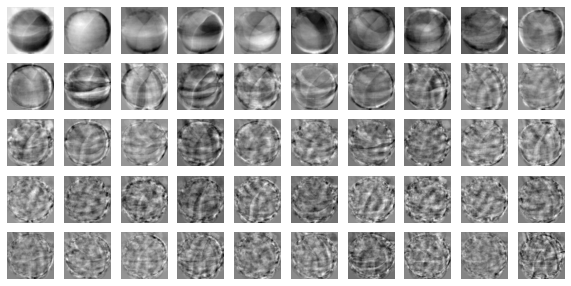

In [8]:
draw_fruits(fruits_2d_pca_components.reshape(-1, 100, 100))

In [9]:
fruits_2d_pca_50 = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_2d_pca_50.shape)

(300, 10000)
(300, 50)


In [10]:
print(pca.explained_variance_ratio_)

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.00511201
 0.00486382 0.00480347 0.00447836 0.00437317 0.00408039 0.00389475
 0.00372445 0.00359289 0.00331472 0.00317832 0.00304326 0.00303757
 0.00288922 0.00275799 0.00264929 0.00255856 0.00252024 0.00247009
 0.0023934  0.00230821 0.00221907 0.00216865 0.00212671 0.00195551
 0.00192216 0.00190457 0.00185474 0.00182649 0.00172136 0.0016834
 0.00162304 0.00159198]


In [11]:
print(np.sum(pca.explained_variance_ratio_))

0.9215227876732565


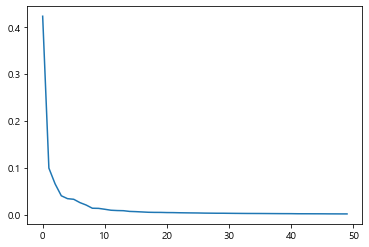

In [12]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [13]:
fruits_inverse = pca.inverse_transform(fruits_2d_pca_50)
print(fruits_inverse.shape)

(300, 10000)


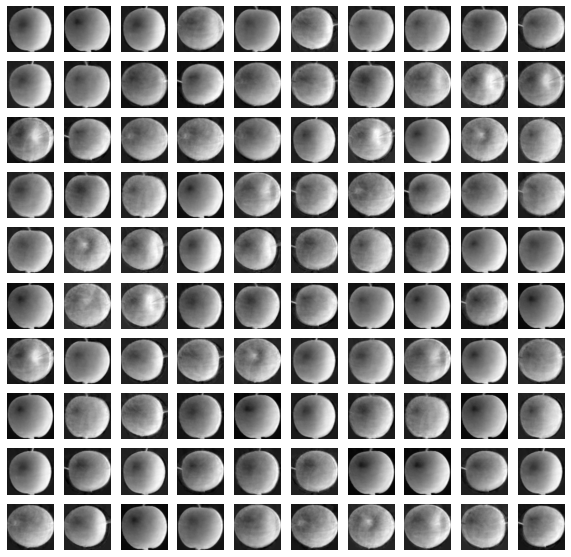

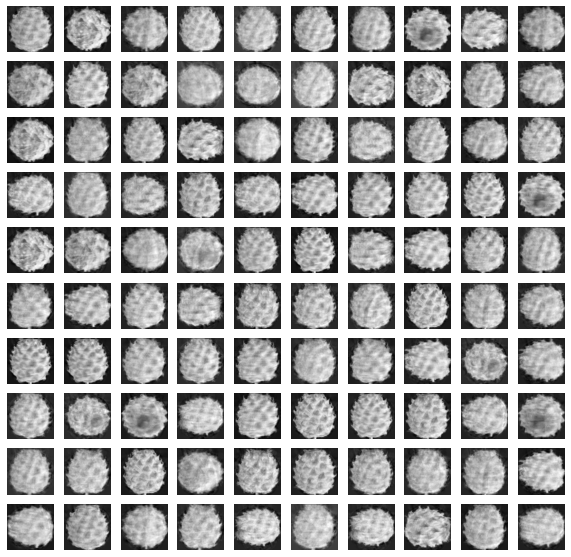

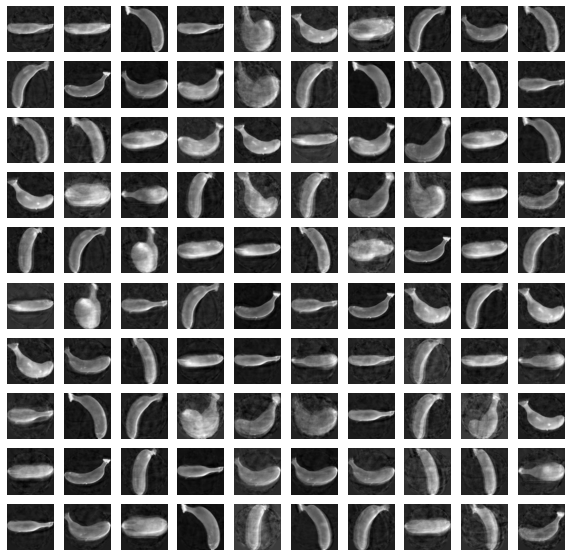

In [14]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])